In [1]:
import warnings
warnings.filterwarnings('ignore')
import importlib

import numpy as np
# import wlcstat.wlc_copoly as wlc_copoly
# import wlcstat.wlcstruc as wlcstruc

import sys
sys.path.append("./vertex_subroutines")
from GAMcalc import *  # Code for calculating vertex functions
import propagator  # propagator object used to store pre-calculated values
import wignerD as wd # wigner D object used to store pre-calculated values

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import basinhopping

from gaus_vertex import *

import time

pset=propagator.prop_set(nlam=10) 
wigset = wd.wigner_d_vals()

# exotic phases

In [ ]:
# %%time
#SINGLE WAVEMODE PHASE DIAGRAM  ABA TRIBLOCK
N = 10000

# fa_array = np.arange(0.3, 0.501, 0.01)#[0.3, 0.325, 0.35, 0.375, 0.3875, 0.4, 0.4125, 0.425, 0.4375, 0.45, 0.475, 0.5]#[0.3, 0.35, 0.4, 0.45, 0.5]#np.arange(0.2, 0.51, .02)
chi_array = np.arange(15, 30, .01)/N#np.arange(5, 30, 0.5)/N #np.array([5, 7, 10, 12, 15, 17, 20])/N #* N

# N_m = 1000
b = 1
# M = 10

# fa_array = [0.3, 0.4, 0.5, 0.6, 0.7]
# poly_type = "diblock"
# n_p = 1


lam_pnts = np.array([])
cyl_pnts = np.array([])
bcc_pnts = np.array([])
gyr_pnts = np.array([])
sq_cyl_pnts = np.array([])
sim_cub_pnts = np.array([])
fcc_pnts = np.array([])
dis_pnts = np.array([])

# ABA matsen
dens = [1.]
triblock_polyfa = [[0.3, [0]*int(0.15*20) + [1] * int(0.7*20) + [0]*int(0.15*20)],[0.4, [0,0,1,1,1,1,1,1,0,0]],\
          [0.5, [0,1,1,0]],[0.6, [0,0,0,1,1,1,1,0,0,0]],[0.7, [0]*int(0.35*20) + [1] * int(0.3*20) + [0]*int(0.35*20)]]

# # mahesh
# dens = [.7, 0.15, 0.15]
# triblock_polydisp_polyfa = [[0.5, [[0,0,1,1,1,1,0,0], [0,1,1,1,1,1,1,0], [0,0,0,1,1,0,0,0] ]]]

# for FA in fa_array:
for FA,poly_mat in triblock_polyfa:
    M = int(len(poly_mat))
    N_m = int(10000/M)
#     print(M)
#     print(N_m)
#     poly_mat, dens = poly_mat_gen(poly_type, M, n_p, FA) 
    
    q_star = spinodal_gaus(poly_mat, dens, N_m, b, M)
    q_star = q_star[0]
#     print(q_star)
    
    lam_q = q_star*np.array([1, 0, 0])
    
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    
    bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
    bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
    bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
    bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
    bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
    bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])
    
    sq_6 = (1/np.sqrt(6)) * q_star
    gyr_q1 = sq_6*np.array([-1, 2, 1])
    gyr_q2 = sq_6*np.array([2, 1, -1])
    gyr_q3 = sq_6*np.array([1, -1, 2])
    gyr_q4 = sq_6*np.array([2, -1, -1])
    gyr_q5 = sq_6*np.array([-1, 2, -1])
    gyr_q6 = sq_6*np.array([-1, -1, 2])
    
    gyr_q7 = sq_6*np.array([2, 1, 1])
    gyr_q8 = sq_6*np.array([1, 2, 1])
    gyr_q9 = sq_6*np.array([1, 1, 2])
    gyr_q10 = sq_6*np.array([2, -1, 1])
    gyr_q11 = sq_6*np.array([1, 2, -1])
    gyr_q12 = sq_6*np.array([-1, 1, 2])

    sq_cyl_q1 = q_star * np.array([1,0,0])
    sq_cyl_q2 = q_star * np.array([0,1,0])
    
    sim_cub_q1 = q_star * np.array([1,0,0])
    sim_cub_q2 = q_star * np.array([0,1,0])
    sim_cub_q3 = q_star * np.array([0,0,1])
    
    fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
    fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
    fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
    fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])
    
    
    G3 = gamma3_E(poly_mat, dens, N_m, b, M, cyl_qs) # all g3s are eqivlaent
    lam_g3 = 0
    cyl_g3 = -(1/6) * (1/(3*np.sqrt(3))) * 12 * G3
    bcc_g3 = -(4/(3*np.sqrt(6))) * G3 #* gamma3_E(poly_mat, dens, N_m, b, M, np.array([bcc_q6, bcc_q3, -bcc_q1]))
    gyr_g3 = (1/6)  * (1/(12*np.sqrt(12))) * 48  * G3 #* gamma3_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
    sq_cyl_g3 = 0
    sim_cub_g3 = 0
    fcc_g3 = 0
    
    G4_00 = gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    lam_g4 = (1/24) * (6) * (1) * G4_00#gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    cyl_g4 = (1/12)* (G4_00 + \
              4*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
    bcc_g4 = (1/24)* (G4_00 \
                     + 8*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                     + 2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                     + 4*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
    gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                       144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                       576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                       -288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                       144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                       -288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))
    
    G4_90deg = gamma4_E(poly_mat, dens, N_m, b, M, np.array([sq_cyl_q1 , -sq_cyl_q1 , sq_cyl_q2 , -sq_cyl_q2 ]))
    sq_cyl_g4 = (1/24) * (1/4) * (12*G4_00 + \
                                  24*G4_90deg)
    sim_cub_g4 = (1/24) * (1/9) * (18*G4_00+ \
                                   72*G4_90deg)
    fcc_g4 = (1/24) * (1/16) * (24*G4_00\
                                + 144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([fcc_q1, -fcc_q1, fcc_q2, -fcc_q2]))\
                                - 48*gamma4_E(poly_mat, dens, N_m, b, M, np.array([-fcc_q1, fcc_q2, fcc_q3, fcc_q4])))
    
    for CHI in chi_array:
        lam_g2 = (1/2) * 2 * (1) * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)                
        cyl_g2 = lam_g2#(1/2) * 6 * (1/3) * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)
        bcc_g2 = lam_g2#(1/2) * 12 * (1/6) * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)
        gyr_g2 = lam_g2
        sq_cyl_g2 = lam_g2#(1/2) * (1/2) * 4 * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)
        sim_cub_g2 = lam_g2
        fcc_g2 = lam_g2
        
        amp_l1 = optimize.fmin(lambda amps: np.real(amps**2 * lam_g2 + amps**3 * lam_g3 + amps**4 * lam_g4), \
                              1, disp=False)
        amp_c1 = optimize.fmin(lambda amps: np.real(amps**2 * cyl_g2 + amps**3 * cyl_g3 + amps**4 * cyl_g4), \
                              1, disp=False)
        amp_bcc1 = optimize.fmin(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
                              1, disp=False)
        amp_g1 = optimize.fmin(lambda amps: np.real(amps**2 * gyr_g2 + amps**3 * gyr_g3 + amps**4 * gyr_g4), \
                              1, disp=False)
        amp_sq_c1 = optimize.fmin(lambda amps: np.real(amps**2 * sq_cyl_g2 + amps**3 * sq_cyl_g3 + amps**4 * sq_cyl_g4), \
                              1, disp=False)
        amp_sim_cub1 = optimize.fmin(lambda amps: np.real(amps**2 * sim_cub_g2 + amps**3 * sim_cub_g3 + amps**4 * sim_cub_g4), \
                              1, disp=False)
        amp_fcc1 = optimize.fmin(lambda amps: np.real(amps**2 * fcc_g2 + amps**3 * fcc_g3 + amps**4 * fcc_g4), \
                              1, disp=False)
        
        lamF = amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 
        cylF = amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 
        bccF = amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4
        gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4
        sq_cylF = amp_sq_c1**2 * sq_cyl_g2 + amp_sq_c1**3 * sq_cyl_g3 + amp_sq_c1**4 * sq_cyl_g4 
        sim_cubF = amp_sim_cub1**2 * sim_cub_g2 + amp_sim_cub1**3 * sim_cub_g3 + amp_sim_cub1**4 * sim_cub_g4 
        fccF = amp_fcc1**2 * fcc_g2 + amp_fcc1**3 * fcc_g3 + amp_fcc1**4 * fcc_g4
        
#         l1 = optimize.basinhopping(lambda amps: np.real(amps**2 * lam_g2 + amps**3 * lam_g3 + amps**4 * lam_g4), \
#                               1, disp=False)
#         c1 = optimize.basinhopping(lambda amps: np.real(amps**2 * cyl_g2 + amps**3 * cyl_g3 + amps**4 * cyl_g4), \
#                               1, disp=False)
#         bcc1 = optimize.basinhopping(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
#                               1, disp=False)
#         g1 = optimize.basinhopping(lambda amps: np.real(amps**2 * gyr_g2 + amps**3 * gyr_g3 + amps**4 * gyr_g4), \
#                               1, disp=False)
#         sq_c1 = optimize.basinhopping(lambda amps: np.real(amps**2 * sq_cyl_g2 + amps**3 * sq_cyl_g3 + amps**4 * sq_cyl_g4), \
#                               1, disp=False)
#         sim_cub1 = optimize.basinhopping(lambda amps: np.real(amps**2 * sim_cub_g2 + amps**3 * sim_cub_g3 + amps**4 * sim_cub_g4), \
#                               1, disp=False)
#         fcc1 = optimize.basinhopping(lambda amps: np.real(amps**2 * fcc_g2 + amps**3 * fcc_g3 + amps**4 * fcc_g4), \
#                               1, disp=False)
        
#         lamF = l1.fun
#         cylF = c1.fun
#         bccF = bcc1.fun
#         gyrF = g1.fun
#         sq_cylF = sq_c1.fun
#         sim_cubF = sim_cub1.fun 
#         fccF = fcc1.fun

        point = np.array([FA, CHI*N])
        minF = min([lamF, cylF, bccF, gyrF, sq_cylF, sim_cubF, fccF])
        if minF > 0:
            dis_pnts = np.append(dis_pnts, point)
        elif minF == lamF:
            lam_pnts = np.append(lam_pnts, point) 
        elif minF == cylF:
            cyl_pnts = np.append(cyl_pnts, point)
        elif minF == bccF:
            bcc_pnts = np.append(bcc_pnts, point)
        elif minF == gyrF:
            gyr_pnts = np.append(gyr_pnts, point)
        elif minF == sq_cylF:
            sq_cyl_pnts = np.append(sq_cyl_pnts, point)
        elif minF == sim_cubF:
            sim_cub_pnts = np.append(sim_cub_pnts, point)
        elif minF == fccF:
            fcc_pnts = np.append(fcc_pnts, point)
        else:
            raise Exception("error in min F phase assignment")
      
    print("one FA done!!")
            

In [ ]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2]/2, label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2]/2, label = "cyl", color = "orange")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2]/2, label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2]/2, label = "lam", color = "blue")

ax.scatter(fcc_pnts[::2], fcc_pnts[1::2], label = "fcc", color = "pink")
ax.scatter(sq_cyl_pnts[::2], sq_cyl_pnts[1::2], label = "sq cyl", color = "yellow")
ax.scatter(sim_cub_pnts[::2], sim_cub_pnts[1::2], label = "simple cubic", color = "purple")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2]/2, label = "gyroid")

# ax.scatter(dis_pnts_vert[::2], dis_pnts_vert[1::2], label = "dis", color = "grey")
# ax.scatter(lam_pnts_vert[::2], lam_pnts_vert[1::2], label = "mono lam", color = "purple")
# ax.scatter(cyl_pnts_vert[::2], cyl_pnts_vert[1::2], label = "cyl", color = "yellow")

# ax.scatter([0.5, 0.4, 0.6, 0.3, 0.7],[9.05, 10.06, 9.14, 12.78, 11.02], color = "black", label = "matsen triblock (scft, imageJ)", marker = "x")
plt.plot([0.3, 0.4, 0.5, 0.6,0.7], [12.78, 10.06, 9.05, 9.14, 11.02], color = "black", label = "matsen triblock (scft, imageJ)")

# new_fa = np.arange(0.301, 0.7, 0.001)
# new_fa_lam = np.arange(0.4, 0.6, 0.001)

# plt.plot(new_fa_lam, laminterp(new_fa_lam), label = "lam gaus", color = "blue")
# plt.plot(new_fa, disinterp(new_fa), label = "cyl gaus", color = "black")

# plt.plot(new_fa_lam, laminterp_vert(new_fa_lam), label = "lam wlc", linestyle = "--", color = "red")
# plt.plot(new_fa, disinterp_vert(new_fa), label = "cyl wlc", linestyle = "--", color = "orange")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_ylim(7.5, 15)
ax.set_ylabel("$\chi N/2$")
ax.set_xlabel("$f_A$")
ax.set_title("ABA triblock phase diagram, two wavemode, N = " + str(N) )

In [ ]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2]/2, label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2]/2, label = "cyl", color = "orange")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2]/2, label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2]/2, label = "lam", color = "blue")

ax.scatter(fcc_pnts[::2], fcc_pnts[1::2], label = "fcc", color = "pink")
ax.scatter(sq_cyl_pnts[::2], sq_cyl_pnts[1::2], label = "sq cyl", color = "yellow")
ax.scatter(sim_cub_pnts[::2], sim_cub_pnts[1::2], label = "simple cubic", color = "purple")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2]/2, label = "gyroid")

# ax.scatter(dis_pnts_vert[::2], dis_pnts_vert[1::2], label = "dis", color = "grey")
# ax.scatter(lam_pnts_vert[::2], lam_pnts_vert[1::2], label = "mono lam", color = "purple")
# ax.scatter(cyl_pnts_vert[::2], cyl_pnts_vert[1::2], label = "cyl", color = "yellow")

# ax.scatter([0.5, 0.4, 0.6, 0.3, 0.7],[9.05, 10.06, 9.14, 12.78, 11.02], color = "black", label = "matsen triblock (scft, imageJ)", marker = "x")
plt.plot([0.3, 0.4, 0.5, 0.6,0.7], [12.78, 10.06, 9.05, 9.14, 11.02], color = "black", label = "matsen triblock (scft, imageJ)")

# new_fa = np.arange(0.301, 0.7, 0.001)
# new_fa_lam = np.arange(0.4, 0.6, 0.001)

# plt.plot(new_fa_lam, laminterp(new_fa_lam), label = "lam gaus", color = "blue")
# plt.plot(new_fa, disinterp(new_fa), label = "cyl gaus", color = "black")

# plt.plot(new_fa_lam, laminterp_vert(new_fa_lam), label = "lam wlc", linestyle = "--", color = "red")
# plt.plot(new_fa, disinterp_vert(new_fa), label = "cyl wlc", linestyle = "--", color = "orange")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_ylim(7.5, 15)
ax.set_ylabel("$\chi N/2$")
ax.set_xlabel("$f_A$")
ax.set_title("ABA triblock phase diagram, single wavemode, N = " + str(N) )

In [2]:
# polyd0p3 = [[0]*int(0.15*20) + [1] * int(0.7*20) + [0]*int(0.15*20), [0]*int(0.1*20) + [1] * int(0.8*20) + [0]*int(0.1*20)]
polyd0p2 = [[0,1,1,1,1,1,1,1,1,0], [0,1,1,1,1,1,1,1,1,0]]
polyd0p4 = [[0,0,1,1,1,1,1,1,0,0], [0,1,1,1,1,1,1,1,1,0]]
polyd0p6 = [[0,0,0,1,1,1,1,0,0,0], [0,1,1,1,1,1,1,1,1,0]]
polyd0p8 = [[0,0,0,0,1,1,0,0,0,0], [0,1,1,1,1,1,1,1,1,0]]

In [3]:
FAmaj = 0.2
FAdop = 0.2
polyd40_0p2 = [[0]*int((FAmaj/2)*40) + [1] * int((1-FAmaj)*40) + [0]*int((FAmaj/2)*40),\
              [0]*int((FAdop/2)*40) + [1] * int((1-FAdop)*40) + [0]*int((FAdop/2)*40)]

In [4]:
FAmaj = 0.25
FAdop = 0.2
polyd40_0p25 = [[0]*int((FAmaj/2)*40) + [1] * int((1-FAmaj)*40) + [0]*int((FAmaj/2)*40),\
              [0]*int((FAdop/2)*40) + [1] * int((1-FAdop)*40) + [0]*int((FAdop/2)*40)]

In [5]:
FAmaj = 0.3
FAdop = 0.2
polyd40_0p3 = [[0]*int((FAmaj/2)*40) + [1] * int((1-FAmaj)*40) + [0]*int((FAmaj/2)*40),\
              [0]*int((FAdop/2)*40) + [1] * int((1-FAdop)*40) + [0]*int((FAdop/2)*40)]

In [6]:
FAmaj = 0.35
FAdop = 0.2
polyd40_0p35 = [[0]*int((FAmaj/2)*40) + [1] * int((1-FAmaj)*40) + [0]*int((FAmaj/2)*40),\
              [0]*int((FAdop/2)*40) + [1] * int((1-FAdop)*40) + [0]*int((FAdop/2)*40)]

In [7]:
FAmaj = 0.4
FAdop = 0.2
polyd40_0p4 = [[0]*int((FAmaj/2)*40) + [1] * int((1-FAmaj)*40) + [0]*int((FAmaj/2)*40),\
              [0]*int((FAdop/2)*40) + [1] * int((1-FAdop)*40) + [0]*int((FAdop/2)*40)]

In [8]:
FAmaj = 0.45
FAdop = 0.2
polyd40_0p45 = [[0]*int((FAmaj/2)*40) + [1] * int((1-FAmaj)*40) + [0]*int((FAmaj/2)*40),\
              [0]*int((FAdop/2)*40) + [1] * int((1-FAdop)*40) + [0]*int((FAdop/2)*40)]

In [9]:
# no gyroid
FAmaj = 0.5
FAdop = 0.2
polyd40_0p5 = [[0]*int((FAmaj/2)*40) + [1] * int((1-FAmaj)*40) + [0]*int((FAmaj/2)*40),\
              [0]*int((FAdop/2)*40) + [1] * int((1-FAdop)*40) + [0]*int((FAdop/2)*40)]

In [10]:
# no gyroid
FAmaj = 0.55
FAdop = 0.2
polyd40_0p55 = [[0]*int((FAmaj/2)*40) + [1] * int((1-FAmaj)*40) + [0]*int((FAmaj/2)*40),\
              [0]*int((FAdop/2)*40) + [1] * int((1-FAdop)*40) + [0]*int((FAdop/2)*40)]

In [11]:
FAmaj = 0.6
FAdop = 0.2
polyd40_0p6 = [[0]*int((FAmaj/2)*40) + [1] * int((1-FAmaj)*40) + [0]*int((FAmaj/2)*40),\
              [0]*int((FAdop/2)*40) + [1] * int((1-FAdop)*40) + [0]*int((FAdop/2)*40)]

In [19]:
# %%time
# Gaus two harmonics ABA

N=10000
b=1
chi_array = np.arange(1, 50, 1)/N#np.arange(5, 30, 0.5)/N #np.array([5, 7, 10, 12, 15, 17, 20])/N #* N


# dens = [1.]
# triblock_polyfa = [[0.3, [0]*int(0.15*20) + [1] * int(0.7*20) + [0]*int(0.15*20)],[0.4, [0,0,1,1,1,1,1,1,0,0]],\
#           [0.5, [0,1,1,0]],[0.6, [0,0,0,1,1,1,1,0,0,0]],[0.7, [0]*int(0.35*20) + [1] * int(0.3*20) + [0]*int(0.35*20)]]

# trb_mono = [[0.2, [0,1,1,1,1,1,1,1,1,0]], [0.4, [0,0,1,1,1,1,1,1,0,0]], [0.6, [0,0,0,1,1,1,1,0,0,0]], [0.8, [0,0,0,0,1,1,0,0,0,0]]]
# dens = [1.]

# dens = [.8, 0.2]
dens=[1., 0.]

# trb_poly = [[0.2, polyd0p2], [0.4, polyd0p4], [0.6, polyd0p6], [0.8, polyd0p8]]
trb_poly_40 = [[0.2, polyd40_0p2],[0.25, polyd40_0p25],[0.3, polyd40_0p3],\
               [0.35, polyd40_0p35], [0.4, polyd40_0p4], [0.45, polyd40_0p45],\
               [0.5, polyd40_0p5], [0.55, polyd40_0p55], [0.6, polyd40_0p6]]
# mini_triblock_polyfa = [[0.6, [0,0,0,1,1,1,1,0,0,0]]]
# chi_array = [28/N, 40/N]

# mahesh
# dens = [.6, 0.0, 0.4]
# # dens = [1,0,0]
# triblock_polydisp_polyfa = [[0.5, [[0,0,1,1,1,1,0,0], [0,1,1,1,1,1,1,0], [0,0,0,1,1,0,0,0] ]]]

dis_pnts = np.array([])
lam_pnts = np.array([])
cyl_pnts = np.array([])
gyr_pnts = np.array([])
bcc_pnts = np.array([])
# sq_cyl_pnts = np.array([])
# sim_cub_pnts = np.array([])
# fcc_pnts = np.array([])

# for FA,poly_mat in triblock_polydisp_polyfa:
# for FA,poly_mat in triblock_polyfa:
# for FA,poly_mat in trb_mono:
# for FA,poly_mat in trb_poly:
for FA,poly_mat in trb_poly_40:
    M = int(len(poly_mat[0]))
    N_m = int(10000/M)
    
    q_star = spinodal_gaus(poly_mat, dens, N_m, b, M)
    q_star = q_star[0]
    print(q_star)
    
    lam_q = q_star*np.array([1, 0, 0])
    
    lam_q_2 = q_star*np.array([2, 0, 0])
    
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    
    cyl_q1_2 = q_star*np.array([0, np.sqrt(3), 0])
    cyl_q2_2 = 0.5*q_star*np.array([3, -np.sqrt(3), 0])
    cyl_q3_2 = 0.5*q_star*np.array([-3, -np.sqrt(3), 0])
    cyl_qs_2 = np.array([cyl_q1_2, cyl_q2_2, cyl_q3_2])
    
    sq_6 = (1/np.sqrt(6)) * q_star
    gyr_q1 = sq_6*np.array([-1, 2, 1])
    gyr_q2 = sq_6*np.array([2, 1, -1])
    gyr_q3 = sq_6*np.array([1, -1, 2])
    gyr_q4 = sq_6*np.array([2, -1, -1])
    gyr_q5 = sq_6*np.array([-1, 2, -1])
    gyr_q6 = sq_6*np.array([-1, -1, 2])
    
    gyr_q7 = sq_6*np.array([2, 1, 1])
    gyr_q8 = sq_6*np.array([1, 2, 1])
    gyr_q9 = sq_6*np.array([1, 1, 2])
    gyr_q10 = sq_6*np.array([2, -1, 1])
    gyr_q11 = sq_6*np.array([1, 2, -1])
    gyr_q12 = sq_6*np.array([-1, 1, 2])
    
    gyr_q1_2 = sq_6*np.array([2, 2, 0])
    gyr_q2_2 = sq_6*np.array([2, 0, 2])
    gyr_q3_2 = sq_6*np.array([0, 2, 2])
    gyr_q4_2 = sq_6*np.array([-2, 2, 0])
    gyr_q5_2 = sq_6*np.array([-2, 0, 2])
    gyr_q6_2 = sq_6*np.array([0, -2, 2])
    
    bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
    bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
    bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
    bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
    bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
    bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])

#     sq_cyl_q1 = q_star * np.array([1,0,0])
#     sq_cyl_q2 = q_star * np.array([0,1,0])
    
#     sim_cub_q1 = q_star * np.array([1,0,0])
#     sim_cub_q2 = q_star * np.array([0,1,0])
#     sim_cub_q3 = q_star * np.array([0,0,1])
    
#     fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
#     fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
#     fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
#     fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])
    
    G3 = gamma3_E(poly_mat, dens, N_m, b, M, cyl_qs) # all g3s are eqivlaent

    lam_g3 = 0
    lam_g3_2 = 0
    lam_g3_mix = -(1/6) * 6 * gamma3_E(poly_mat, dens, N_m, b, M, np.array([lam_q, lam_q, -lam_q_2])) 
    
    cyl_g3 = -(1/6)  * (1/(3*np.sqrt(3))) * 12 * G3#gamma3_E(poly_mat, dens, N_m, b, M, cyl_qs)
    cyl_g3_2 = -(1/6)  * (1/(3*np.sqrt(3))) * 12 * gamma3_E(poly_mat, dens, N_m, b, M, cyl_qs_2)
    cyl_g3_mix = -(1/6) * (1/(3*np.sqrt(3))) * 36 * gamma3_E(poly_mat, dens, N_m, b, M, np.array([-cyl_q2_2, -cyl_q2, cyl_q1]))

    gyr_g3 = -(1/6)  * (1/(12*np.sqrt(12))) * 48 * G3#gamma3_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
    gyr_g3_2 = -(1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))
    gyr_g3_mix = -(1/6) * (1/(12*np.sqrt(6))) * 72 * gamma3_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q4, -gyr_q3_2]))

    bcc_g3 = -(4/(3*np.sqrt(6))) * G3#gamma3_E(poly_mat, dens, N_m, b, M, np.array([bcc_q6, bcc_q3, -bcc_q1]))

    G4_00 = gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    
    lam_g4 = (1/24) * (6) * G4_00#gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    lam_g4_2 = (1/24) * (6)  * gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q_2, -lam_q_2, lam_q_2, -lam_q_2]))
    lam_g4_mix = (1/24) * 24  * gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q_2, -lam_q_2])) #used to be 24
    
    cyl_g4 = (1/24) * (1/9) *(18*G4_00 + \
              72*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
    cyl_g4_2 = (1/24) * (1/9) * (18*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1_2 , -cyl_q1_2 , cyl_q1_2 , -cyl_q1_2 ])) + \
              72*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1_2, -cyl_q1_2, cyl_q2_2, -cyl_q2_2]))) 

    cyl_g4_mix1 = (1/3) * (2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([-cyl_q3_2, cyl_q3, -cyl_q2, -cyl_q2_2])) + \
                           3*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q2_2, -cyl_q2_2, -cyl_q3, cyl_q3])) + \
                           2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1, -cyl_q1, -cyl_q3_2, cyl_q3_2])))
    cyl_g4_mix2 = (1/3) * gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q2_2, cyl_q2, cyl_q2, cyl_q3]))

    
    gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                       144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                       576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                       -288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                       144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                       -288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))
    
    gyr_g4_2 = (1/24) * (1/36) * (36*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])) + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q1_2, gyr_q2_2, -gyr_q2_2])) + \
                       72*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q1_2, gyr_q4_2, -gyr_q4_2])) + \
                       144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q2_2, gyr_q5_2, -gyr_q4_2])))

    gyr_g4_mix1 = (1/24) * (1/(6*12)) * (576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])) + \
                           576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q1, gyr_q1_2, -gyr_q1_2])) + \
                           -576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q4_2, gyr_q11, -gyr_q1_2])) + \
                           288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q4_2, gyr_q1, -gyr_q3_2])) + \
                           -576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q4_2, -gyr_q6_2, -gyr_q11])) + \
                           288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q6_2, -gyr_q6_2])) + \
                           288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q3_2, -gyr_q3_2])))
    
    gyr_g4_mix2 = (1/3) * (2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
                           -1*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
                           -1*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))#-1*gamma4(pset, wigset, N, FA, np.array([gyr_q8, -gyr_q3_2, -gyr_q7, gyr_q9]))) 

    bcc_g4 = (1/24)* (G4_00 \
                     + 8*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                     + 2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                     + 4*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
    
    for CHI in chi_array:
        lam_g2 = (1/2) * 2 * (1) * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)       
        lam_g2_2 = (1/2) * 2 * (1) * gamma2_E(poly_mat, dens, N_m, b, M, 2*q_star, CHI)         
        
        cyl_g2 = lam_g2
        cyl_g2_2 = (1/2) * (1/3) * 6  * gamma2_E(poly_mat, dens, N_m, b, M, np.sqrt(3)*q_star, CHI)    

        gyr_g2 = lam_g2
        gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2_E(poly_mat, dens, N_m, b, M, np.sqrt(4/3)*q_star, CHI)    
        
        bcc_g2 = lam_g2
        
        # when doing phase minimization, should always have the gamma 3 be negative.
        if cyl_g3>0:
            cyl_g3*= -1
        if cyl_g3_2>0:
            cyl_g3_2*= -1
        if cyl_g3_mix>0:
            cyl_g3_mix*= -1
            
        if gyr_g3>0:
            gyr_g3*= -1
        if gyr_g3_2>0:
            gyr_g3_2*= -1
        if gyr_g3_mix>0:
            gyr_g3_mix*= -1
            
        if lam_g3_mix>0:
            lam_g3_mix*= -1
            
        if bcc_g3>0:
            bcc_g3*= -1

#         if FA >= 0.5:
#             initial = [-1, -1] 
#             in_bcc = -1
#         else:
#             initial = [1,1]
#             in_bcc = 1
            
        initial = [0, 0] 
        in_bcc = 0
#         ###### double gyroid, singla all others #######
#         amp_l1 = optimize.fmin(lambda amps: np.real(amps[0]**2 * lam_g2 + amps[0]**3 * lam_g3 + amps[0]**4 * lam_g4), \
#                               0, disp=False)

#         amp_c1 = optimize.fmin(lambda amps: np.real(amps[0]**2 * cyl_g2 + amps[0]**3 * cyl_g3 + amps[0]**4 * cyl_g4), \
#                               0, disp=False)
#         amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
#                                                  amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
#                                                  amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
#                                                  amps[0]**3 * amps[1] * gyr_g4_mix2), \
#                               initial, disp=False)

#         amp_bcc1 = optimize.fmin(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
#                               in_bcc, disp=False)
        
#         lamF = amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4
        
#         cylF = amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4
        
#         gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
#                 amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
#                 amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
#                 amp_g1**3 * amp_g2 * gyr_g4_mix2
        
#         bccF = amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4

#         ###### fmin ######
#         amp_l1, amp_l2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * lam_g2 + amps[0]**3 * lam_g3 + amps[0]**4 * lam_g4 + \
#                                                         amps[1]**2 * lam_g2_2 + amps[1]**3 * lam_g3_2 + amps[1]**4 * lam_g4_2 + \
#                                                         amps[0]**2 * amps[1] * lam_g3_mix + amps[0]**2 * amps[1]**2 * lam_g4_mix), \
#                               initial, disp=False)

#         amp_c1, amp_c2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * cyl_g2 + amps[0]**3 * cyl_g3 + amps[0]**4 * cyl_g4 + \
#                                                  amps[1]**2 * cyl_g2_2 + amps[1]**3 * cyl_g3_2 + amps[1]**4 * cyl_g4_2 + \
#                                                  amps[0]**2 * amps[1] * cyl_g3_mix + amps[0]**2 * amps[1]**2 * cyl_g4_mix1 + \
#                                                  amps[0]**3 * amps[1] * cyl_g4_mix2), \
#                               initial, disp=False)
#         amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
#                                                  amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
#                                                  amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
#                                                  amps[0]**3 * amps[1] * gyr_g4_mix2), \
#                               initial, disp=False)

#         amp_bcc1 = optimize.fmin(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
#                               in_bcc, disp=False)
        
#         lamF = amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 + \
#                 amp_l2**2 * lam_g2_2 + amp_l2**3 * lam_g3_2 + amp_l2**4 * lam_g4_2 +\
#                 amp_l1**2 * amp_l2 * lam_g3_mix + amp_l1**2 * amp_l2**2 * lam_g4_mix
        
#         cylF = amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 +\
#                 amp_c2**2 * cyl_g2_2 + amp_c2**3 * cyl_g3_2 + amp_c2**4 * cyl_g4_2 + \
#                 amp_c1**2 * amp_c2 * cyl_g3_mix + amp_c1**2 * amp_c2**2 * cyl_g4_mix1 +\
#                 amp_c1**3 * amp_c2 * cyl_g4_mix2
        
#         gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
#                 amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
#                 amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
#                 amp_g1**3 * amp_g2 * gyr_g4_mix2
        
#         bccF = amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4

        ###### basin hopping #######
        num_iters = 100
        lam = basinhopping(lambda amps: np.real(amps[0]**2 * lam_g2 + amps[0]**3 * lam_g3 + amps[0]**4 * lam_g4 + \
                                                        amps[1]**2 * lam_g2_2 + amps[1]**3 * lam_g3_2 + amps[1]**4 * lam_g4_2 + \
                                                        amps[0]**2 * amps[1] * lam_g3_mix + amps[0]**2 * amps[1]**2 * lam_g4_mix), \
                              initial, disp=False, niter = num_iters)


        cyl = basinhopping(lambda amps: np.real(amps[0]**2 * cyl_g2 + amps[0]**3 * cyl_g3 + amps[0]**4 * cyl_g4 + \
                                                 amps[1]**2 * cyl_g2_2 + amps[1]**3 * cyl_g3_2 + amps[1]**4 * cyl_g4_2 + \
                                                 amps[0]**2 * amps[1] * cyl_g3_mix + amps[0]**2 * amps[1]**2 * cyl_g4_mix1 + \
                                                 amps[0]**3 * amps[1] * cyl_g4_mix2), \
                              initial, disp=False, niter = num_iters)
        
        gyr = basinhopping(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
                                                 amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
                                                 amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
                                                 amps[0]**3 * amps[1] * gyr_g4_mix2), \
                              initial, disp=False, niter = num_iters)
        
        bcc = basinhopping(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
                              in_bcc, disp=False, niter = num_iters)
        
        lamF = lam.fun
        
        cylF = cyl.fun
        
        gyrF = gyr.fun
        
        bccF = bcc.fun

#         print("lamF", lamF)
#         print("cylF", cylF)
#         print("gyrF", gyrF)
#         print("bccF", bccF)
        
#         cylF = 1e20
        
        point = np.array([FA, CHI*N])

        minF = min([lamF, cylF, gyrF, bccF])# bccF, sq_cylF, sim_cubF, fccF])
#         print(minF)
        if minF >= 0:
#             phase_name = "dis"
            dis_pnts = np.append(dis_pnts, point)
        elif minF == lamF:
#             phase_name = "lam" 
            lam_pnts = np.append(lam_pnts, point) 
        elif minF == cylF:
#             phase_name = "cyl"
            cyl_pnts = np.append(cyl_pnts, point)
        elif minF == gyrF:
            gyr_pnts = np.append(gyr_pnts, point)
        elif minF == bccF:
            bcc_pnts = np.append(bcc_pnts, point)
#         elif minF == sq_cylF:
#             phase_name = "sqcyl"
#         elif minF == sim_cubF:
#             phase_name = "simcub"
#         elif minF == fccF:
#             phase_name = "fcc"
        else:
            raise Exception("error in min F phase assignment")

#         print("cyl_g2", cyl_g2)
#         print("cyl_g2_2", cyl_g2_2)
    print("one FA done!!")

0.06956250000000008
one FA done!!
0.06756250000000008
one FA done!!
0.06625000000000009
one FA done!!
0.06531250000000008
one FA done!!
0.06481250000000008
one FA done!!
0.06450000000000009
one FA done!!
0.06450000000000009
one FA done!!
0.06475000000000009
one FA done!!
0.06525000000000009
one FA done!!


Text(0.5, 1.0, 'mono ABA triblock phase diagram, two wavemode, bsnhpng, N = 10000')

<Figure size 432x288 with 0 Axes>

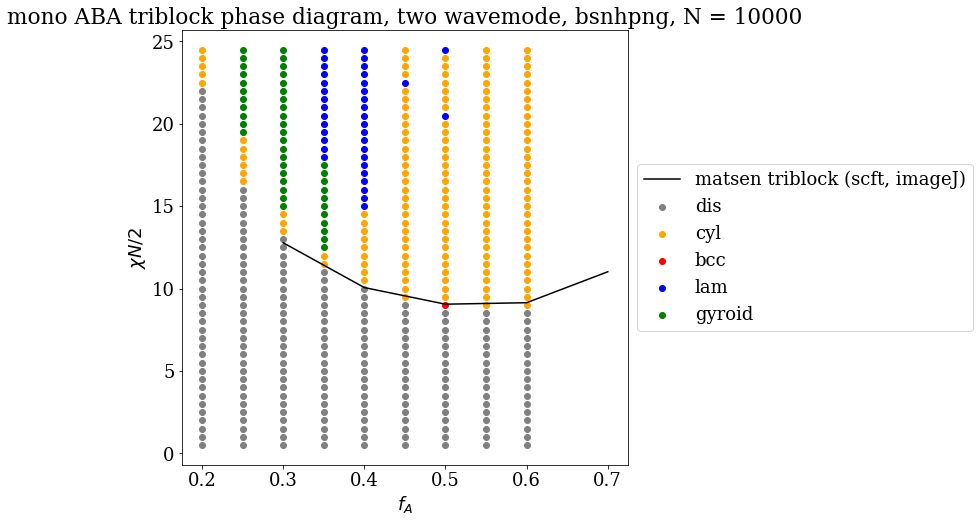

In [20]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2]/2, label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2]/2, label = "cyl", color = "orange")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2]/2, label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2]/2, label = "lam", color = "blue")

# ax.scatter(fcc_pnts[::2], fcc_pnts[1::2], label = "fcc", color = "pink")
# ax.scatter(sq_cyl_pnts[::2], sq_cyl_pnts[1::2], label = "sq cyl", color = "yellow")
# ax.scatter(sim_cub_pnts[::2], sim_cub_pnts[1::2], label = "simple cubic", color = "purple")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2]/2, label = "gyroid", color = "green")

# ax.scatter(dis_pnts_vert[::2], dis_pnts_vert[1::2], label = "dis", color = "grey")
# ax.scatter(lam_pnts_vert[::2], lam_pnts_vert[1::2], label = "mono lam", color = "purple")
# ax.scatter(cyl_pnts_vert[::2], cyl_pnts_vert[1::2], label = "cyl", color = "yellow")

# ax.scatter([0.5, 0.4, 0.6, 0.3, 0.7],[9.05, 10.06, 9.14, 12.78, 11.02], color = "black", label = "matsen triblock (scft, imageJ)", marker = "x")
plt.plot([0.3, 0.4, 0.5, 0.6,0.7], [12.78, 10.06, 9.05, 9.14, 11.02], color = "black", label = "matsen triblock (scft, imageJ)")

# new_fa = np.arange(0.301, 0.7, 0.001)
# new_fa_lam = np.arange(0.4, 0.6, 0.001)

# plt.plot(new_fa_lam, laminterp(new_fa_lam), label = "lam gaus", color = "blue")
# plt.plot(new_fa, disinterp(new_fa), label = "cyl gaus", color = "black")

# plt.plot(new_fa_lam, laminterp_vert(new_fa_lam), label = "lam wlc", linestyle = "--", color = "red")
# plt.plot(new_fa, disinterp_vert(new_fa), label = "cyl wlc", linestyle = "--", color = "orange")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(7.5, 15)
ax.set_ylabel("$\chi N/2$")
ax.set_xlabel("$f_A$")
ax.set_title("mono ABA triblock phase diagram, two wavemode, bsnhpng, N = " + str(N) )

In [21]:
# %%time
# Gaus two harmonics ABA


chi_array = np.arange(1, 50, 1)/N#np.arange(5, 30, 0.5)/N #np.array([5, 7, 10, 12, 15, 17, 20])/N #* N


# dens = [1.]
# triblock_polyfa = [[0.3, [0]*int(0.15*20) + [1] * int(0.7*20) + [0]*int(0.15*20)],[0.4, [0,0,1,1,1,1,1,1,0,0]],\
#           [0.5, [0,1,1,0]],[0.6, [0,0,0,1,1,1,1,0,0,0]],[0.7, [0]*int(0.35*20) + [1] * int(0.3*20) + [0]*int(0.35*20)]]

# trb_mono = [[0.2, [0,1,1,1,1,1,1,1,1,0]], [0.4, [0,0,1,1,1,1,1,1,0,0]], [0.6, [0,0,0,1,1,1,1,0,0,0]], [0.8, [0,0,0,0,1,1,0,0,0,0]]]
# dens = [1.]

dens = [.8, 0.2]
# dens=[1., 0.]
# trb_poly = [[0.2, polyd0p2], [0.4, polyd0p4], [0.6, polyd0p6], [0.8, polyd0p8]]

trb_poly_40 = [[0.2, polyd40_0p2],[0.25, polyd40_0p25],[0.3, polyd40_0p3],\
               [0.35, polyd40_0p35], [0.4, polyd40_0p4], [0.45, polyd40_0p45],\
               [0.5, polyd40_0p5], [0.55, polyd40_0p55], [0.6, polyd40_0p6]]
# mini_triblock_polyfa = [[0.6, [0,0,0,1,1,1,1,0,0,0]]]
# chi_array = [28/N, 40/N]

# mahesh
# dens = [.6, 0.0, 0.4]
# # dens = [1,0,0]
# triblock_polydisp_polyfa = [[0.5, [[0,0,1,1,1,1,0,0], [0,1,1,1,1,1,1,0], [0,0,0,1,1,0,0,0] ]]]

dis_pnts = np.array([])
lam_pnts = np.array([])
cyl_pnts = np.array([])
gyr_pnts = np.array([])
bcc_pnts = np.array([])
# sq_cyl_pnts = np.array([])
# sim_cub_pnts = np.array([])
# fcc_pnts = np.array([])

# for FA,poly_mat in triblock_polydisp_polyfa:
# for FA,poly_mat in triblock_polyfa:
# for FA,poly_mat in trb_mono:
# for FA,poly_mat in trb_poly:
for FA,poly_mat in trb_poly_40:
    M = int(len(poly_mat[0]))
    N_m = int(10000/M)
    
    q_star = spinodal_gaus(poly_mat, dens, N_m, b, M)
    q_star = q_star[0]
    print(q_star)
    
    lam_q = q_star*np.array([1, 0, 0])
    
    lam_q_2 = q_star*np.array([2, 0, 0])
    
    cyl_q1 = q_star*np.array([1, 0, 0])
    cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
    cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
    cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    
    cyl_q1_2 = q_star*np.array([0, np.sqrt(3), 0])
    cyl_q2_2 = 0.5*q_star*np.array([3, -np.sqrt(3), 0])
    cyl_q3_2 = 0.5*q_star*np.array([-3, -np.sqrt(3), 0])
    cyl_qs_2 = np.array([cyl_q1_2, cyl_q2_2, cyl_q3_2])
    
    sq_6 = (1/np.sqrt(6)) * q_star
    gyr_q1 = sq_6*np.array([-1, 2, 1])
    gyr_q2 = sq_6*np.array([2, 1, -1])
    gyr_q3 = sq_6*np.array([1, -1, 2])
    gyr_q4 = sq_6*np.array([2, -1, -1])
    gyr_q5 = sq_6*np.array([-1, 2, -1])
    gyr_q6 = sq_6*np.array([-1, -1, 2])
    
    gyr_q7 = sq_6*np.array([2, 1, 1])
    gyr_q8 = sq_6*np.array([1, 2, 1])
    gyr_q9 = sq_6*np.array([1, 1, 2])
    gyr_q10 = sq_6*np.array([2, -1, 1])
    gyr_q11 = sq_6*np.array([1, 2, -1])
    gyr_q12 = sq_6*np.array([-1, 1, 2])
    
    gyr_q1_2 = sq_6*np.array([2, 2, 0])
    gyr_q2_2 = sq_6*np.array([2, 0, 2])
    gyr_q3_2 = sq_6*np.array([0, 2, 2])
    gyr_q4_2 = sq_6*np.array([-2, 2, 0])
    gyr_q5_2 = sq_6*np.array([-2, 0, 2])
    gyr_q6_2 = sq_6*np.array([0, -2, 2])
    
    bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
    bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
    bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
    bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
    bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
    bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])

#     sq_cyl_q1 = q_star * np.array([1,0,0])
#     sq_cyl_q2 = q_star * np.array([0,1,0])
    
#     sim_cub_q1 = q_star * np.array([1,0,0])
#     sim_cub_q2 = q_star * np.array([0,1,0])
#     sim_cub_q3 = q_star * np.array([0,0,1])
    
#     fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
#     fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
#     fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
#     fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])
    
    G3 = gamma3_E(poly_mat, dens, N_m, b, M, cyl_qs) # all g3s are eqivlaent

    lam_g3 = 0
    lam_g3_2 = 0
    lam_g3_mix = -(1/6) * 6 * gamma3_E(poly_mat, dens, N_m, b, M, np.array([lam_q, lam_q, -lam_q_2])) 
    
    cyl_g3 = -(1/6)  * (1/(3*np.sqrt(3))) * 12 * G3#gamma3_E(poly_mat, dens, N_m, b, M, cyl_qs)
    cyl_g3_2 = -(1/6)  * (1/(3*np.sqrt(3))) * 12 * gamma3_E(poly_mat, dens, N_m, b, M, cyl_qs_2)
    cyl_g3_mix = -(1/6) * (1/(3*np.sqrt(3))) * 36 * gamma3_E(poly_mat, dens, N_m, b, M, np.array([-cyl_q2_2, -cyl_q2, cyl_q1]))

    gyr_g3 = -(1/6)  * (1/(12*np.sqrt(12))) * 48 * G3#gamma3_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
    gyr_g3_2 = -(1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))
    gyr_g3_mix = -(1/6) * (1/(12*np.sqrt(6))) * 72 * gamma3_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q4, -gyr_q3_2]))

    bcc_g3 = -(4/(3*np.sqrt(6))) * G3#gamma3_E(poly_mat, dens, N_m, b, M, np.array([bcc_q6, bcc_q3, -bcc_q1]))

    G4_00 = gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    
    lam_g4 = (1/24) * (6) * G4_00#gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    lam_g4_2 = (1/24) * (6)  * gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q_2, -lam_q_2, lam_q_2, -lam_q_2]))
    lam_g4_mix = (1/24) * 24  * gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q_2, -lam_q_2])) #used to be 24
    
    cyl_g4 = (1/24) * (1/9) *(18*G4_00 + \
              72*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
    cyl_g4_2 = (1/24) * (1/9) * (18*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1_2 , -cyl_q1_2 , cyl_q1_2 , -cyl_q1_2 ])) + \
              72*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1_2, -cyl_q1_2, cyl_q2_2, -cyl_q2_2]))) 

    cyl_g4_mix1 = (1/3) * (2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([-cyl_q3_2, cyl_q3, -cyl_q2, -cyl_q2_2])) + \
                           3*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q2_2, -cyl_q2_2, -cyl_q3, cyl_q3])) + \
                           2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1, -cyl_q1, -cyl_q3_2, cyl_q3_2])))
    cyl_g4_mix2 = (1/3) * gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q2_2, cyl_q2, cyl_q2, cyl_q3]))

    
    gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
                       144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
                       576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
                       -288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
                       144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
                       -288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))
    
    gyr_g4_2 = (1/24) * (1/36) * (36*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])) + \
                       288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q1_2, gyr_q2_2, -gyr_q2_2])) + \
                       72*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q1_2, gyr_q4_2, -gyr_q4_2])) + \
                       144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q2_2, gyr_q5_2, -gyr_q4_2])))

    gyr_g4_mix1 = (1/24) * (1/(6*12)) * (576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])) + \
                           576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q1, gyr_q1_2, -gyr_q1_2])) + \
                           -576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q4_2, gyr_q11, -gyr_q1_2])) + \
                           288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q4_2, gyr_q1, -gyr_q3_2])) + \
                           -576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q4_2, -gyr_q6_2, -gyr_q11])) + \
                           288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q6_2, -gyr_q6_2])) + \
                           288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q3_2, -gyr_q3_2])))
    
    gyr_g4_mix2 = (1/3) * (2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
                           -1*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
                           -1*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))#-1*gamma4(pset, wigset, N, FA, np.array([gyr_q8, -gyr_q3_2, -gyr_q7, gyr_q9]))) 

    bcc_g4 = (1/24)* (G4_00 \
                     + 8*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
                     + 2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
                     + 4*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
    
    for CHI in chi_array:
        lam_g2 = (1/2) * 2 * (1) * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)       
        lam_g2_2 = (1/2) * 2 * (1) * gamma2_E(poly_mat, dens, N_m, b, M, 2*q_star, CHI)         
        
        cyl_g2 = lam_g2
        cyl_g2_2 = (1/2) * (1/3) * 6  * gamma2_E(poly_mat, dens, N_m, b, M, np.sqrt(3)*q_star, CHI)    

        gyr_g2 = lam_g2
        gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2_E(poly_mat, dens, N_m, b, M, np.sqrt(4/3)*q_star, CHI)    
        
        bcc_g2 = lam_g2
        
        # when doing phase minimization, should always have the gamma 3 be negative.
        if cyl_g3>0:
            cyl_g3*= -1
        if cyl_g3_2>0:
            cyl_g3_2*= -1
        if cyl_g3_mix>0:
            cyl_g3_mix*= -1
            
        if gyr_g3>0:
            gyr_g3*= -1
        if gyr_g3_2>0:
            gyr_g3_2*= -1
        if gyr_g3_mix>0:
            gyr_g3_mix*= -1
            
        if lam_g3_mix>0:
            lam_g3_mix*= -1
            
        if bcc_g3>0:
            bcc_g3*= -1

#         if FA >= 0.5:
#             initial = [-1, -1] 
#             in_bcc = -1
#         else:
#             initial = [1,1]
#             in_bcc = 1
            
        initial = [0, 0] 
        in_bcc = 0
#         ###### double gyroid, singla all others #######
#         amp_l1 = optimize.fmin(lambda amps: np.real(amps[0]**2 * lam_g2 + amps[0]**3 * lam_g3 + amps[0]**4 * lam_g4), \
#                               0, disp=False)

#         amp_c1 = optimize.fmin(lambda amps: np.real(amps[0]**2 * cyl_g2 + amps[0]**3 * cyl_g3 + amps[0]**4 * cyl_g4), \
#                               0, disp=False)
#         amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
#                                                  amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
#                                                  amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
#                                                  amps[0]**3 * amps[1] * gyr_g4_mix2), \
#                               initial, disp=False)

#         amp_bcc1 = optimize.fmin(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
#                               in_bcc, disp=False)
        
#         lamF = amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4
        
#         cylF = amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4
        
#         gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
#                 amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
#                 amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
#                 amp_g1**3 * amp_g2 * gyr_g4_mix2
        
#         bccF = amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4

#         ###### fmin ######
#         amp_l1, amp_l2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * lam_g2 + amps[0]**3 * lam_g3 + amps[0]**4 * lam_g4 + \
#                                                         amps[1]**2 * lam_g2_2 + amps[1]**3 * lam_g3_2 + amps[1]**4 * lam_g4_2 + \
#                                                         amps[0]**2 * amps[1] * lam_g3_mix + amps[0]**2 * amps[1]**2 * lam_g4_mix), \
#                               initial, disp=False)

#         amp_c1, amp_c2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * cyl_g2 + amps[0]**3 * cyl_g3 + amps[0]**4 * cyl_g4 + \
#                                                  amps[1]**2 * cyl_g2_2 + amps[1]**3 * cyl_g3_2 + amps[1]**4 * cyl_g4_2 + \
#                                                  amps[0]**2 * amps[1] * cyl_g3_mix + amps[0]**2 * amps[1]**2 * cyl_g4_mix1 + \
#                                                  amps[0]**3 * amps[1] * cyl_g4_mix2), \
#                               initial, disp=False)
#         amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
#                                                  amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
#                                                  amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
#                                                  amps[0]**3 * amps[1] * gyr_g4_mix2), \
#                               initial, disp=False)

#         amp_bcc1 = optimize.fmin(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
#                               in_bcc, disp=False)
        
#         lamF = amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 + \
#                 amp_l2**2 * lam_g2_2 + amp_l2**3 * lam_g3_2 + amp_l2**4 * lam_g4_2 +\
#                 amp_l1**2 * amp_l2 * lam_g3_mix + amp_l1**2 * amp_l2**2 * lam_g4_mix
        
#         cylF = amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 +\
#                 amp_c2**2 * cyl_g2_2 + amp_c2**3 * cyl_g3_2 + amp_c2**4 * cyl_g4_2 + \
#                 amp_c1**2 * amp_c2 * cyl_g3_mix + amp_c1**2 * amp_c2**2 * cyl_g4_mix1 +\
#                 amp_c1**3 * amp_c2 * cyl_g4_mix2
        
#         gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
#                 amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
#                 amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
#                 amp_g1**3 * amp_g2 * gyr_g4_mix2
        
#         bccF = amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4

        ###### basin hopping #######
        num_iters = 100
        lam = basinhopping(lambda amps: np.real(amps[0]**2 * lam_g2 + amps[0]**3 * lam_g3 + amps[0]**4 * lam_g4 + \
                                                        amps[1]**2 * lam_g2_2 + amps[1]**3 * lam_g3_2 + amps[1]**4 * lam_g4_2 + \
                                                        amps[0]**2 * amps[1] * lam_g3_mix + amps[0]**2 * amps[1]**2 * lam_g4_mix), \
                              initial, disp=False, niter = num_iters)


        cyl = basinhopping(lambda amps: np.real(amps[0]**2 * cyl_g2 + amps[0]**3 * cyl_g3 + amps[0]**4 * cyl_g4 + \
                                                 amps[1]**2 * cyl_g2_2 + amps[1]**3 * cyl_g3_2 + amps[1]**4 * cyl_g4_2 + \
                                                 amps[0]**2 * amps[1] * cyl_g3_mix + amps[0]**2 * amps[1]**2 * cyl_g4_mix1 + \
                                                 amps[0]**3 * amps[1] * cyl_g4_mix2), \
                              initial, disp=False, niter = num_iters)
        
        gyr = basinhopping(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
                                                 amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
                                                 amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
                                                 amps[0]**3 * amps[1] * gyr_g4_mix2), \
                              initial, disp=False, niter = num_iters)
        
        bcc = basinhopping(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
                              in_bcc, disp=False, niter = num_iters)
        
        lamF = lam.fun
        
        cylF = cyl.fun
        
        gyrF = gyr.fun
        
        bccF = bcc.fun

#         print("lamF", lamF)
#         print("cylF", cylF)
#         print("gyrF", gyrF)
#         print("bccF", bccF)
        
#         cylF = 1e20
        
        point = np.array([FA, CHI*N])

        minF = min([lamF, cylF, gyrF, bccF])# bccF, sq_cylF, sim_cubF, fccF])
#         print(minF)
        if minF >= 0:
#             phase_name = "dis"
            dis_pnts = np.append(dis_pnts, point)
        elif minF == lamF:
#             phase_name = "lam" 
            lam_pnts = np.append(lam_pnts, point) 
        elif minF == cylF:
#             phase_name = "cyl"
            cyl_pnts = np.append(cyl_pnts, point)
        elif minF == gyrF:
            gyr_pnts = np.append(gyr_pnts, point)
        elif minF == bccF:
            bcc_pnts = np.append(bcc_pnts, point)
#         elif minF == sq_cylF:
#             phase_name = "sqcyl"
#         elif minF == sim_cubF:
#             phase_name = "simcub"
#         elif minF == fccF:
#             phase_name = "fcc"
        else:
            raise Exception("error in min F phase assignment")

#         print("cyl_g2", cyl_g2)
#         print("cyl_g2_2", cyl_g2_2)
    print("one FA done!!")

0.06956250000000008
one FA done!!
0.06762500000000009
one FA done!!
0.06587500000000009
one FA done!!
0.06437500000000008
one FA done!!
0.06300000000000008
one FA done!!
0.06162500000000008
one FA done!!
0.06018750000000008
one FA done!!
0.05843750000000008
one FA done!!
0.05575000000000008
one FA done!!


Text(0.5, 1.0, 'poly ABA triblock phase diagram, two wavemode, bsnhpng, N = 10000')

<Figure size 432x288 with 0 Axes>

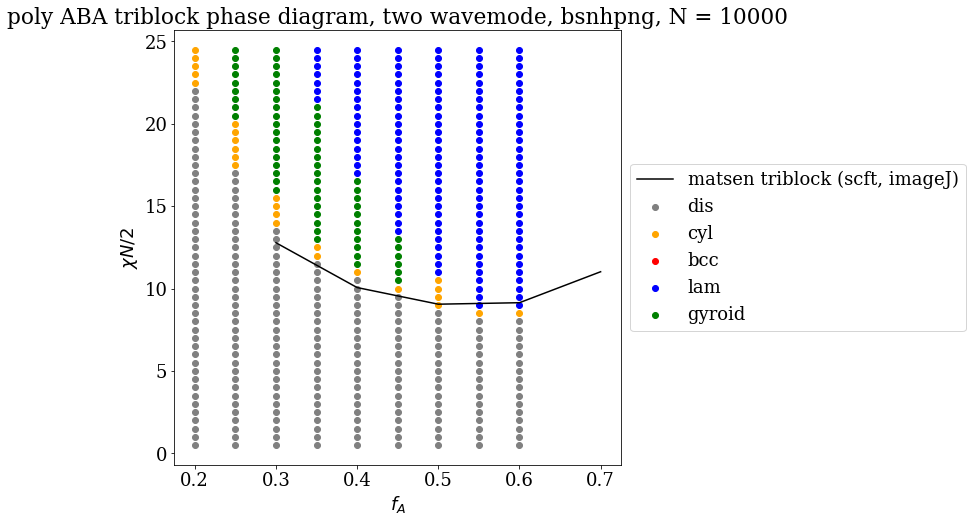

In [22]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2]/2, label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2]/2, label = "cyl", color = "orange")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2]/2, label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2]/2, label = "lam", color = "blue")

# ax.scatter(fcc_pnts[::2], fcc_pnts[1::2], label = "fcc", color = "pink")
# ax.scatter(sq_cyl_pnts[::2], sq_cyl_pnts[1::2], label = "sq cyl", color = "yellow")
# ax.scatter(sim_cub_pnts[::2], sim_cub_pnts[1::2], label = "simple cubic", color = "purple")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2]/2, label = "gyroid", color = "green")

# ax.scatter(dis_pnts_vert[::2], dis_pnts_vert[1::2], label = "dis", color = "grey")
# ax.scatter(lam_pnts_vert[::2], lam_pnts_vert[1::2], label = "mono lam", color = "purple")
# ax.scatter(cyl_pnts_vert[::2], cyl_pnts_vert[1::2], label = "cyl", color = "yellow")

# ax.scatter([0.5, 0.4, 0.6, 0.3, 0.7],[9.05, 10.06, 9.14, 12.78, 11.02], color = "black", label = "matsen triblock (scft, imageJ)", marker = "x")
plt.plot([0.3, 0.4, 0.5, 0.6,0.7], [12.78, 10.06, 9.05, 9.14, 11.02], color = "black", label = "matsen triblock (scft, imageJ)")

# new_fa = np.arange(0.301, 0.7, 0.001)
# new_fa_lam = np.arange(0.4, 0.6, 0.001)

# plt.plot(new_fa_lam, laminterp(new_fa_lam), label = "lam gaus", color = "blue")
# plt.plot(new_fa, disinterp(new_fa), label = "cyl gaus", color = "black")

# plt.plot(new_fa_lam, laminterp_vert(new_fa_lam), label = "lam wlc", linestyle = "--", color = "red")
# plt.plot(new_fa, disinterp_vert(new_fa), label = "cyl wlc", linestyle = "--", color = "orange")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(7.5, 15)
ax.set_ylabel("$\chi N/2$")
ax.set_xlabel("$f_A$")
ax.set_title("poly ABA triblock phase diagram, two wavemode, bsnhpng, N = " + str(N) )

In [ ]:
# # %%time
# # Gaus two harmonics ABA


# chi_array = np.arange(1, 50, 1)/N#np.arange(5, 30, 0.5)/N #np.array([5, 7, 10, 12, 15, 17, 20])/N #* N


# # dens = [1.]
# # triblock_polyfa = [[0.3, [0]*int(0.15*20) + [1] * int(0.7*20) + [0]*int(0.15*20)],[0.4, [0,0,1,1,1,1,1,1,0,0]],\
# #           [0.5, [0,1,1,0]],[0.6, [0,0,0,1,1,1,1,0,0,0]],[0.7, [0]*int(0.35*20) + [1] * int(0.3*20) + [0]*int(0.35*20)]]

# # trb_mono = [[0.2, [0,1,1,1,1,1,1,1,1,0]], [0.4, [0,0,1,1,1,1,1,1,0,0]], [0.6, [0,0,0,1,1,1,1,0,0,0]], [0.8, [0,0,0,0,1,1,0,0,0,0]]]
# # dens = [1.]

# dens = [.8, 0.2]
# # dens=[1., 0.]
# trb_poly = [[0.2, polyd0p2], [0.4, polyd0p4], [0.6, polyd0p6], [0.8, polyd0p8]]

# trb_poly_20 = [[0.2, polyd20_0p2],[0.25, polyd20_0p25],[0.3, polyd20_0p3],\
#                [0.35, polyd20_0p35], [0.4, polyd20_0p4], [0.45, polyd20_0p45],\
#                [0.5, polyd20_0p5], [0.55, polyd20_0p55], [0.6, polyd20_0p6]]
# # mini_triblock_polyfa = [[0.6, [0,0,0,1,1,1,1,0,0,0]]]
# # chi_array = [28/N, 40/N]

# # mahesh
# # dens = [.6, 0.0, 0.4]
# # # dens = [1,0,0]
# # triblock_polydisp_polyfa = [[0.5, [[0,0,1,1,1,1,0,0], [0,1,1,1,1,1,1,0], [0,0,0,1,1,0,0,0] ]]]

# dis_pnts = np.array([])
# lam_pnts = np.array([])
# cyl_pnts = np.array([])
# gyr_pnts = np.array([])
# bcc_pnts = np.array([])
# # sq_cyl_pnts = np.array([])
# # sim_cub_pnts = np.array([])
# # fcc_pnts = np.array([])

# # for FA,poly_mat in triblock_polydisp_polyfa:
# # for FA,poly_mat in triblock_polyfa:
# # for FA,poly_mat in trb_mono:
# # for FA,poly_mat in trb_poly:
# for FA,poly_mat in trb_poly_20:
#     M = int(len(poly_mat[0]))
#     N_m = int(10000/M)
    
#     q_star = spinodal_gaus(poly_mat, dens, N_m, b, M)
#     q_star = q_star[0]
#     print(q_star)
    
#     lam_q = q_star*np.array([1, 0, 0])
    
#     lam_q_2 = q_star*np.array([2, 0, 0])
    
#     cyl_q1 = q_star*np.array([1, 0, 0])
#     cyl_q2 = 0.5*q_star*np.array([-1, np.sqrt(3), 0])
#     cyl_q3 = 0.5*q_star*np.array([-1, -np.sqrt(3), 0])
#     cyl_qs = np.array([cyl_q1, cyl_q2, cyl_q3])
    
#     cyl_q1_2 = q_star*np.array([0, np.sqrt(3), 0])
#     cyl_q2_2 = 0.5*q_star*np.array([3, -np.sqrt(3), 0])
#     cyl_q3_2 = 0.5*q_star*np.array([-3, -np.sqrt(3), 0])
#     cyl_qs_2 = np.array([cyl_q1_2, cyl_q2_2, cyl_q3_2])
    
#     sq_6 = (1/np.sqrt(6)) * q_star
#     gyr_q1 = sq_6*np.array([-1, 2, 1])
#     gyr_q2 = sq_6*np.array([2, 1, -1])
#     gyr_q3 = sq_6*np.array([1, -1, 2])
#     gyr_q4 = sq_6*np.array([2, -1, -1])
#     gyr_q5 = sq_6*np.array([-1, 2, -1])
#     gyr_q6 = sq_6*np.array([-1, -1, 2])
    
#     gyr_q7 = sq_6*np.array([2, 1, 1])
#     gyr_q8 = sq_6*np.array([1, 2, 1])
#     gyr_q9 = sq_6*np.array([1, 1, 2])
#     gyr_q10 = sq_6*np.array([2, -1, 1])
#     gyr_q11 = sq_6*np.array([1, 2, -1])
#     gyr_q12 = sq_6*np.array([-1, 1, 2])
    
#     gyr_q1_2 = sq_6*np.array([2, 2, 0])
#     gyr_q2_2 = sq_6*np.array([2, 0, 2])
#     gyr_q3_2 = sq_6*np.array([0, 2, 2])
#     gyr_q4_2 = sq_6*np.array([-2, 2, 0])
#     gyr_q5_2 = sq_6*np.array([-2, 0, 2])
#     gyr_q6_2 = sq_6*np.array([0, -2, 2])
    
#     bcc_q1 = 2**(-0.5)*q_star*np.array([1,1,0])
#     bcc_q2 = 2**(-0.5)*q_star*np.array([-1,1,0])
#     bcc_q3 = 2**(-0.5)*q_star*np.array([0,1,1])
#     bcc_q4 = 2**(-0.5)*q_star*np.array([0,1,-1])
#     bcc_q5 = 2**(-0.5)*q_star*np.array([1,0,1])
#     bcc_q6 = 2**(-0.5)*q_star*np.array([1,0,-1])

# #     sq_cyl_q1 = q_star * np.array([1,0,0])
# #     sq_cyl_q2 = q_star * np.array([0,1,0])
    
# #     sim_cub_q1 = q_star * np.array([1,0,0])
# #     sim_cub_q2 = q_star * np.array([0,1,0])
# #     sim_cub_q3 = q_star * np.array([0,0,1])
    
# #     fcc_q1 = 3**(-0.5)*q_star*np.array([1,1,1])
# #     fcc_q2 = 3**(-0.5)*q_star*np.array([1,1,-1])
# #     fcc_q3 = 3**(-0.5)*q_star*np.array([1,-1,1])
# #     fcc_q4 = 3**(-0.5)*q_star*np.array([-1,1,1])
    
#     G3 = gamma3_E(poly_mat, dens, N_m, b, M, cyl_qs) # all g3s are eqivlaent

#     lam_g3 = 0
#     lam_g3_2 = 0
#     lam_g3_mix = -(1/6) * 6 * gamma3_E(poly_mat, dens, N_m, b, M, np.array([lam_q, lam_q, -lam_q_2])) 
    
#     cyl_g3 = -(1/6)  * (1/(3*np.sqrt(3))) * 12 * G3#gamma3_E(poly_mat, dens, N_m, b, M, cyl_qs)
#     cyl_g3_2 = -(1/6)  * (1/(3*np.sqrt(3))) * 12 * gamma3_E(poly_mat, dens, N_m, b, M, cyl_qs_2)
#     cyl_g3_mix = -(1/6) * (1/(3*np.sqrt(3))) * 36 * gamma3_E(poly_mat, dens, N_m, b, M, np.array([-cyl_q2_2, -cyl_q2, cyl_q1]))

#     gyr_g3 = -(1/6)  * (1/(12*np.sqrt(12))) * 48 * G3#gamma3_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q11, -gyr_q3]))
#     gyr_g3_2 = -(1/6) * (1/(6*np.sqrt(6))) * 48 * gamma3_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q3_2, gyr_q5_2]))
#     gyr_g3_mix = -(1/6) * (1/(12*np.sqrt(6))) * 72 * gamma3_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q4, -gyr_q3_2]))

#     bcc_g3 = -(4/(3*np.sqrt(6))) * G3#gamma3_E(poly_mat, dens, N_m, b, M, np.array([bcc_q6, bcc_q3, -bcc_q1]))

#     G4_00 = gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q, -lam_q]))
    
#     lam_g4 = (1/24) * (6) * G4_00#gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q, -lam_q]))
#     lam_g4_2 = (1/24) * (6)  * gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q_2, -lam_q_2, lam_q_2, -lam_q_2]))
#     lam_g4_mix = (1/24) * 24  * gamma4_E(poly_mat, dens, N_m, b, M, np.array([lam_q, -lam_q, lam_q_2, -lam_q_2])) #used to be 24
    
#     cyl_g4 = (1/24) * (1/9) *(18*G4_00 + \
#               72*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1, -cyl_q1, cyl_q2, -cyl_q2])))
#     cyl_g4_2 = (1/24) * (1/9) * (18*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1_2 , -cyl_q1_2 , cyl_q1_2 , -cyl_q1_2 ])) + \
#               72*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1_2, -cyl_q1_2, cyl_q2_2, -cyl_q2_2]))) 

#     cyl_g4_mix1 = (1/3) * (2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([-cyl_q3_2, cyl_q3, -cyl_q2, -cyl_q2_2])) + \
#                            3*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q2_2, -cyl_q2_2, -cyl_q3, cyl_q3])) + \
#                            2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q1, -cyl_q1, -cyl_q3_2, cyl_q3_2])))
#     cyl_g4_mix2 = (1/3) * gamma4_E(poly_mat, dens, N_m, b, M, np.array([cyl_q2_2, cyl_q2, cyl_q2, cyl_q3]))

    
#     gyr_g4 = (1/24)* (1/(12*12)) * (72*G4_00 + \
#                        288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q8, -gyr_q8])) + \
#                        288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q10, -gyr_q10])) + \
#                        288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q11, -gyr_q11])) + \
#                        144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q4, -gyr_q4])) + \
#                        576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q12, -gyr_q12])) + \
#                        -288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, gyr_q4, -gyr_q10, -gyr_q5])) + \
#                        144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q2, gyr_q4, -gyr_q10])) + \
#                        -288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q5, -gyr_q7, gyr_q2])))
    
#     gyr_g4_2 = (1/24) * (1/36) * (36*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q1_2, gyr_q1_2, -gyr_q1_2])) + \
#                        288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q1_2, gyr_q2_2, -gyr_q2_2])) + \
#                        72*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q1_2, gyr_q4_2, -gyr_q4_2])) + \
#                        144*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1_2, -gyr_q2_2, gyr_q5_2, -gyr_q4_2])))

#     gyr_g4_mix1 = (1/24) * (1/(6*12)) * (576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q1, gyr_q4_2, -gyr_q4_2])) + \
#                            576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q1, gyr_q1_2, -gyr_q1_2])) + \
#                            -576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q4_2, gyr_q11, -gyr_q1_2])) + \
#                            288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q4_2, gyr_q1, -gyr_q3_2])) + \
#                            -576*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q4_2, -gyr_q6_2, -gyr_q11])) + \
#                            288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q6_2, -gyr_q6_2])) + \
#                            288*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q7, gyr_q3_2, -gyr_q3_2])))
    
#     gyr_g4_mix2 = (1/3) * (2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, -gyr_q4_2, -gyr_q2, -gyr_q6])) + \
#                            -1*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q7, -gyr_q8, gyr_q3_2, -gyr_q9])) + \
#                            -1*gamma4_E(poly_mat, dens, N_m, b, M, np.array([gyr_q1, gyr_q2, -gyr_q9, gyr_q6_2])))#-1*gamma4(pset, wigset, N, FA, np.array([gyr_q8, -gyr_q3_2, -gyr_q7, gyr_q9]))) 

#     bcc_g4 = (1/24)* (G4_00 \
#                      + 8*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q1, bcc_q3, -bcc_q3])) \
#                      + 2*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q1, bcc_q2, -bcc_q2])) \
#                      + 4*gamma4_E(poly_mat, dens, N_m, b, M, np.array([bcc_q1, -bcc_q3, bcc_q2, -bcc_q4])) )
    
#     for CHI in chi_array:
#         lam_g2 = (1/2) * 2 * (1) * gamma2_E(poly_mat, dens, N_m, b, M, q_star, CHI)       
#         lam_g2_2 = (1/2) * 2 * (1) * gamma2_E(poly_mat, dens, N_m, b, M, 2*q_star, CHI)         
        
#         cyl_g2 = lam_g2
#         cyl_g2_2 = (1/2) * (1/3) * 6  * gamma2_E(poly_mat, dens, N_m, b, M, np.sqrt(3)*q_star, CHI)    

#         gyr_g2 = lam_g2
#         gyr_g2_2 = (1/2) * 12 * (1/6) * gamma2_E(poly_mat, dens, N_m, b, M, np.sqrt(4/3)*q_star, CHI)    
        
#         bcc_g2 = lam_g2
        
#         # when doing phase minimization, should always have the gamma 3 be negative.
#         if cyl_g3>0:
#             cyl_g3*= -1
#         if cyl_g3_2>0:
#             cyl_g3_2*= -1
#         if cyl_g3_mix>0:
#             cyl_g3_mix*= -1
            
#         if gyr_g3>0:
#             gyr_g3*= -1
#         if gyr_g3_2>0:
#             gyr_g3_2*= -1
#         if gyr_g3_mix>0:
#             gyr_g3_mix*= -1
            
#         if lam_g3_mix>0:
#             lam_g3_mix*= -1
            
#         if bcc_g3>0:
#             bcc_g3*= -1

# #         if FA >= 0.5:
# #             initial = [-1, -1] 
# #             in_bcc = -1
# #         else:
# #             initial = [1,1]
# #             in_bcc = 1
            
#         initial = [0, 0] 
#         in_bcc = 0
# #         ###### double gyroid, singla all others #######
# #         amp_l1 = optimize.fmin(lambda amps: np.real(amps[0]**2 * lam_g2 + amps[0]**3 * lam_g3 + amps[0]**4 * lam_g4), \
# #                               0, disp=False)

# #         amp_c1 = optimize.fmin(lambda amps: np.real(amps[0]**2 * cyl_g2 + amps[0]**3 * cyl_g3 + amps[0]**4 * cyl_g4), \
# #                               0, disp=False)
# #         amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
# #                                                  amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
# #                                                  amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
# #                                                  amps[0]**3 * amps[1] * gyr_g4_mix2), \
# #                               initial, disp=False)

# #         amp_bcc1 = optimize.fmin(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
# #                               in_bcc, disp=False)
        
# #         lamF = amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4
        
# #         cylF = amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4
        
# #         gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
# #                 amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
# #                 amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
# #                 amp_g1**3 * amp_g2 * gyr_g4_mix2
        
# #         bccF = amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4

# #         ###### fmin ######
#         amp_l1, amp_l2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * lam_g2 + amps[0]**3 * lam_g3 + amps[0]**4 * lam_g4 + \
#                                                         amps[1]**2 * lam_g2_2 + amps[1]**3 * lam_g3_2 + amps[1]**4 * lam_g4_2 + \
#                                                         amps[0]**2 * amps[1] * lam_g3_mix + amps[0]**2 * amps[1]**2 * lam_g4_mix), \
#                               initial, disp=False)

#         amp_c1, amp_c2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * cyl_g2 + amps[0]**3 * cyl_g3 + amps[0]**4 * cyl_g4 + \
#                                                  amps[1]**2 * cyl_g2_2 + amps[1]**3 * cyl_g3_2 + amps[1]**4 * cyl_g4_2 + \
#                                                  amps[0]**2 * amps[1] * cyl_g3_mix + amps[0]**2 * amps[1]**2 * cyl_g4_mix1 + \
#                                                  amps[0]**3 * amps[1] * cyl_g4_mix2), \
#                               initial, disp=False)
#         amp_g1, amp_g2 = optimize.fmin(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
#                                                  amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
#                                                  amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
#                                                  amps[0]**3 * amps[1] * gyr_g4_mix2), \
#                               initial, disp=False)

#         amp_bcc1 = optimize.fmin(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
#                               in_bcc, disp=False)
        
#         lamF = amp_l1**2 * lam_g2 + amp_l1**3 * lam_g3 + amp_l1**4 * lam_g4 + \
#                 amp_l2**2 * lam_g2_2 + amp_l2**3 * lam_g3_2 + amp_l2**4 * lam_g4_2 +\
#                 amp_l1**2 * amp_l2 * lam_g3_mix + amp_l1**2 * amp_l2**2 * lam_g4_mix
        
#         cylF = amp_c1**2 * cyl_g2 + amp_c1**3 * cyl_g3 + amp_c1**4 * cyl_g4 +\
#                 amp_c2**2 * cyl_g2_2 + amp_c2**3 * cyl_g3_2 + amp_c2**4 * cyl_g4_2 + \
#                 amp_c1**2 * amp_c2 * cyl_g3_mix + amp_c1**2 * amp_c2**2 * cyl_g4_mix1 +\
#                 amp_c1**3 * amp_c2 * cyl_g4_mix2
        
#         gyrF = amp_g1**2 * gyr_g2 + amp_g1**3 * gyr_g3 + amp_g1**4 * gyr_g4 +\
#                 amp_g2**2 * gyr_g2_2 + amp_g2**3 * gyr_g3_2 + amp_g2**4 * gyr_g4_2 + \
#                 amp_g1**2 * amp_g2 * gyr_g3_mix + amp_g1**2 * amp_g2**2 * gyr_g4_mix1 +\
#                 amp_g1**3 * amp_g2 * gyr_g4_mix2
        
#         bccF = amp_bcc1**2 * bcc_g2 + amp_bcc1**3 * bcc_g3 + amp_bcc1**4 * bcc_g4

#         ###### basin hopping #######
# #         num_iters = 100
# #         lam = basinhopping(lambda amps: np.real(amps[0]**2 * lam_g2 + amps[0]**3 * lam_g3 + amps[0]**4 * lam_g4 + \
# #                                                         amps[1]**2 * lam_g2_2 + amps[1]**3 * lam_g3_2 + amps[1]**4 * lam_g4_2 + \
# #                                                         amps[0]**2 * amps[1] * lam_g3_mix + amps[0]**2 * amps[1]**2 * lam_g4_mix), \
# #                               initial, disp=False, niter = num_iters)


# #         cyl = basinhopping(lambda amps: np.real(amps[0]**2 * cyl_g2 + amps[0]**3 * cyl_g3 + amps[0]**4 * cyl_g4 + \
# #                                                  amps[1]**2 * cyl_g2_2 + amps[1]**3 * cyl_g3_2 + amps[1]**4 * cyl_g4_2 + \
# #                                                  amps[0]**2 * amps[1] * cyl_g3_mix + amps[0]**2 * amps[1]**2 * cyl_g4_mix1 + \
# #                                                  amps[0]**3 * amps[1] * cyl_g4_mix2), \
# #                               initial, disp=False, niter = num_iters)
        
# #         gyr = basinhopping(lambda amps: np.real(amps[0]**2 * gyr_g2 + amps[0]**3 * gyr_g3 + amps[0]**4 * gyr_g4 + \
# #                                                  amps[1]**2 * gyr_g2_2 + amps[1]**3 * gyr_g3_2 + amps[1]**4 * gyr_g4_2 + \
# #                                                  amps[0]**2 * amps[1] * gyr_g3_mix + amps[0]**2 * amps[1]**2 * gyr_g4_mix1 + \
# #                                                  amps[0]**3 * amps[1] * gyr_g4_mix2), \
# #                               initial, disp=False, niter = num_iters)
        
# #         bcc = basinhopping(lambda amps: np.real(amps**2 * bcc_g2 + amps**3 * bcc_g3 + amps**4 * bcc_g4), \
# #                               in_bcc, disp=False, niter = num_iters)
        
# #         lamF = lam.fun
        
# #         cylF = cyl.fun
        
# #         gyrF = gyr.fun
        
# #         bccF = bcc.fun

# #         print("lamF", lamF)
# #         print("cylF", cylF)
# #         print("gyrF", gyrF)
# #         print("bccF", bccF)
        
# #         cylF = 1e20
        
#         point = np.array([FA, CHI*N])

#         minF = min([lamF, cylF, gyrF, bccF])# bccF, sq_cylF, sim_cubF, fccF])
# #         print(minF)
#         if minF >= 0:
# #             phase_name = "dis"
#             dis_pnts = np.append(dis_pnts, point)
#         elif minF == lamF:
# #             phase_name = "lam" 
#             lam_pnts = np.append(lam_pnts, point) 
#         elif minF == cylF:
# #             phase_name = "cyl"
#             cyl_pnts = np.append(cyl_pnts, point)
#         elif minF == gyrF:
#             gyr_pnts = np.append(gyr_pnts, point)
#         elif minF == bccF:
#             bcc_pnts = np.append(bcc_pnts, point)
# #         elif minF == sq_cylF:
# #             phase_name = "sqcyl"
# #         elif minF == sim_cubF:
# #             phase_name = "simcub"
# #         elif minF == fccF:
# #             phase_name = "fcc"
#         else:
#             raise Exception("error in min F phase assignment")

# #         print("cyl_g2", cyl_g2)
# #         print("cyl_g2_2", cyl_g2_2)
#     print("one FA done!!")

In [ ]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2]/2, label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2]/2, label = "cyl", color = "orange")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2]/2, label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2]/2, label = "lam", color = "blue")

# ax.scatter(fcc_pnts[::2], fcc_pnts[1::2], label = "fcc", color = "pink")
# ax.scatter(sq_cyl_pnts[::2], sq_cyl_pnts[1::2], label = "sq cyl", color = "yellow")
# ax.scatter(sim_cub_pnts[::2], sim_cub_pnts[1::2], label = "simple cubic", color = "purple")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2]/2, label = "gyroid", color = "green")

# ax.scatter(dis_pnts_vert[::2], dis_pnts_vert[1::2], label = "dis", color = "grey")
# ax.scatter(lam_pnts_vert[::2], lam_pnts_vert[1::2], label = "mono lam", color = "purple")
# ax.scatter(cyl_pnts_vert[::2], cyl_pnts_vert[1::2], label = "cyl", color = "yellow")

# ax.scatter([0.5, 0.4, 0.6, 0.3, 0.7],[9.05, 10.06, 9.14, 12.78, 11.02], color = "black", label = "matsen triblock (scft, imageJ)", marker = "x")
plt.plot([0.3, 0.4, 0.5, 0.6,0.7], [12.78, 10.06, 9.05, 9.14, 11.02], color = "black", label = "matsen triblock (scft, imageJ)")

# new_fa = np.arange(0.301, 0.7, 0.001)
# new_fa_lam = np.arange(0.4, 0.6, 0.001)

# plt.plot(new_fa_lam, laminterp(new_fa_lam), label = "lam gaus", color = "blue")
# plt.plot(new_fa, disinterp(new_fa), label = "cyl gaus", color = "black")

# plt.plot(new_fa_lam, laminterp_vert(new_fa_lam), label = "lam wlc", linestyle = "--", color = "red")
# plt.plot(new_fa, disinterp_vert(new_fa), label = "cyl wlc", linestyle = "--", color = "orange")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(7.5, 15)
ax.set_ylabel("$\chi N/2$")
ax.set_xlabel("$f_A$")
ax.set_title("ABA triblock phase diagram, two wavemode, N = " + str(N) )

In [ ]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")

ax.scatter(fcc_pnts[::2], fcc_pnts[1::2], label = "fcc", color = "pink")
ax.scatter(sq_cyl_pnts[::2], sq_cyl_pnts[1::2], label = "sq cyl", color = "yellow")
ax.scatter(sim_cub_pnts[::2], sim_cub_pnts[1::2], label = "simple cubic", color = "purple")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2], label = "gyroid", color = "green")

# ax.scatter(dis_pnts_vert[::2], dis_pnts_vert[1::2], label = "dis", color = "grey")
# ax.scatter(lam_pnts_vert[::2], lam_pnts_vert[1::2], label = "mono lam", color = "purple")
# ax.scatter(cyl_pnts_vert[::2], cyl_pnts_vert[1::2], label = "cyl", color = "yellow")

# ax.scatter([0.5, 0.4, 0.6, 0.3, 0.7],[9.05, 10.06, 9.14, 12.78, 11.02], color = "black", label = "matsen triblock (scft, imageJ)", marker = "x")
# plt.plot([0.3, 0.4, 0.5, 0.6,0.7], [12.78, 10.06, 9.05, 9.14, 11.02], color = "black", label = "matsen triblock (scft, imageJ)")

# new_fa = np.arange(0.301, 0.7, 0.001)
# new_fa_lam = np.arange(0.4, 0.6, 0.001)

# plt.plot(new_fa_lam, laminterp(new_fa_lam), label = "lam gaus", color = "blue")
# plt.plot(new_fa, disinterp(new_fa), label = "cyl gaus", color = "black")

# plt.plot(new_fa_lam, laminterp_vert(new_fa_lam), label = "lam wlc", linestyle = "--", color = "red")
# plt.plot(new_fa, disinterp_vert(new_fa), label = "cyl wlc", linestyle = "--", color = "orange")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(7.5, 15)
ax.set_ylabel("$\chi N/2$")
ax.set_xlabel("$f_A$")
ax.set_title("ABA triblock mahesh,  N = " + str(N) )

In [ ]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2]/2, label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2]/2, label = "cyl", color = "orange")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2]/2, label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2]/2, label = "lam", color = "blue")

ax.scatter(fcc_pnts[::2], fcc_pnts[1::2], label = "fcc", color = "pink")
ax.scatter(sq_cyl_pnts[::2], sq_cyl_pnts[1::2], label = "sq cyl", color = "yellow")
ax.scatter(sim_cub_pnts[::2], sim_cub_pnts[1::2], label = "simple cubic", color = "purple")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2]/2, label = "gyroid", color = "green")

# ax.scatter(dis_pnts_vert[::2], dis_pnts_vert[1::2], label = "dis", color = "grey")
# ax.scatter(lam_pnts_vert[::2], lam_pnts_vert[1::2], label = "mono lam", color = "purple")
# ax.scatter(cyl_pnts_vert[::2], cyl_pnts_vert[1::2], label = "cyl", color = "yellow")

# ax.scatter([0.5, 0.4, 0.6, 0.3, 0.7],[9.05, 10.06, 9.14, 12.78, 11.02], color = "black", label = "matsen triblock (scft, imageJ)", marker = "x")
plt.plot([0.3, 0.4, 0.5, 0.6,0.7], [12.78, 10.06, 9.05, 9.14, 11.02], color = "black", label = "matsen triblock (scft, imageJ)")

# new_fa = np.arange(0.301, 0.7, 0.001)
# new_fa_lam = np.arange(0.4, 0.6, 0.001)

# plt.plot(new_fa_lam, laminterp(new_fa_lam), label = "lam gaus", color = "blue")
# plt.plot(new_fa, disinterp(new_fa), label = "cyl gaus", color = "black")

# plt.plot(new_fa_lam, laminterp_vert(new_fa_lam), label = "lam wlc", linestyle = "--", color = "red")
# plt.plot(new_fa, disinterp_vert(new_fa), label = "cyl wlc", linestyle = "--", color = "orange")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_ylim(7.5, 15)
ax.set_ylabel("$\chi N/2$")
ax.set_xlabel("$f_A$")
ax.set_title("ABA triblock phase diagram, two wavemode gyr one wvm others, N = " + str(N) )

In [ ]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2]/2, label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2]/2, label = "cyl", color = "orange")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2]/2, label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2]/2, label = "lam", color = "blue")

ax.scatter(fcc_pnts[::2], fcc_pnts[1::2], label = "fcc", color = "pink")
ax.scatter(sq_cyl_pnts[::2], sq_cyl_pnts[1::2], label = "sq cyl", color = "yellow")
ax.scatter(sim_cub_pnts[::2], sim_cub_pnts[1::2], label = "simple cubic", color = "purple")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2]/2, label = "gyroid")

# ax.scatter(dis_pnts_vert[::2], dis_pnts_vert[1::2], label = "dis", color = "grey")
# ax.scatter(lam_pnts_vert[::2], lam_pnts_vert[1::2], label = "mono lam", color = "purple")
# ax.scatter(cyl_pnts_vert[::2], cyl_pnts_vert[1::2], label = "cyl", color = "yellow")

# ax.scatter([0.5, 0.4, 0.6, 0.3, 0.7],[9.05, 10.06, 9.14, 12.78, 11.02], color = "black", label = "matsen triblock (scft, imageJ)", marker = "x")
plt.plot([0.3, 0.4, 0.5, 0.6,0.7], [12.78, 10.06, 9.05, 9.14, 11.02], color = "black", label = "matsen triblock (scft, imageJ)")

# new_fa = np.arange(0.301, 0.7, 0.001)
# new_fa_lam = np.arange(0.4, 0.6, 0.001)

# plt.plot(new_fa_lam, laminterp(new_fa_lam), label = "lam gaus", color = "blue")
# plt.plot(new_fa, disinterp(new_fa), label = "cyl gaus", color = "black")

# plt.plot(new_fa_lam, laminterp_vert(new_fa_lam), label = "lam wlc", linestyle = "--", color = "red")
# plt.plot(new_fa, disinterp_vert(new_fa), label = "cyl wlc", linestyle = "--", color = "orange")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_ylim(7.5, 15)
ax.set_ylabel("$\chi N/2$")
ax.set_xlabel("$f_A$")
ax.set_title("ABA triblock phase diagram, two wavemode bsnhpng, N = " + str(N) )

In [ ]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2], label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2], label = "cyl", color = "orange")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2], label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2], label = "lam", color = "blue")

ax.scatter(fcc_pnts[::2], fcc_pnts[1::2], label = "fcc", color = "pink")
ax.scatter(sq_cyl_pnts[::2], sq_cyl_pnts[1::2], label = "sq cyl", color = "yellow")
ax.scatter(sim_cub_pnts[::2], sim_cub_pnts[1::2], label = "simple cubic", color = "purple")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2], label = "gyroid")

# ax.scatter(dis_pnts_vert[::2], dis_pnts_vert[1::2], label = "dis", color = "grey")
# ax.scatter(lam_pnts_vert[::2], lam_pnts_vert[1::2], label = "mono lam", color = "purple")
# ax.scatter(cyl_pnts_vert[::2], cyl_pnts_vert[1::2], label = "cyl", color = "yellow")

# ax.scatter([0.5, 0.4, 0.6, 0.3, 0.7],[9.05, 10.06, 9.14, 12.78, 11.02], color = "black", label = "matsen triblock (scft, imageJ)", marker = "x")
# plt.plot([0.3, 0.4, 0.5, 0.6,0.7], [12.78, 10.06, 9.05, 9.14, 11.02], color = "black", label = "matsen triblock (scft, imageJ)")

# new_fa = np.arange(0.301, 0.7, 0.001)
# new_fa_lam = np.arange(0.4, 0.6, 0.001)

# plt.plot(new_fa_lam, laminterp(new_fa_lam), label = "lam gaus", color = "blue")
# plt.plot(new_fa, disinterp(new_fa), label = "cyl gaus", color = "black")

# plt.plot(new_fa_lam, laminterp_vert(new_fa_lam), label = "lam wlc", linestyle = "--", color = "red")
# plt.plot(new_fa, disinterp_vert(new_fa), label = "cyl wlc", linestyle = "--", color = "orange")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(7.5, 15)
ax.set_ylabel("$\chi N$")
ax.set_xlabel("$f_A$")
ax.set_title("ABA triblock mahesh phase diagram, single wavemode, N = " + str(N) )

In [ ]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2]/2, label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2]/2, label = "cyl", color = "orange")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2]/2, label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2]/2, label = "lam", color = "blue")

ax.scatter(fcc_pnts[::2], fcc_pnts[1::2], label = "fcc", color = "pink")
ax.scatter(sq_cyl_pnts[::2], sq_cyl_pnts[1::2], label = "sq cyl", color = "yellow")
ax.scatter(sim_cub_pnts[::2], sim_cub_pnts[1::2], label = "simple cubic", color = "purple")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2]/2, label = "gyroid")

# ax.scatter(dis_pnts_vert[::2], dis_pnts_vert[1::2], label = "dis", color = "grey")
# ax.scatter(lam_pnts_vert[::2], lam_pnts_vert[1::2], label = "mono lam", color = "purple")
# ax.scatter(cyl_pnts_vert[::2], cyl_pnts_vert[1::2], label = "cyl", color = "yellow")

# ax.scatter([0.5, 0.4, 0.6, 0.3, 0.7],[9.05, 10.06, 9.14, 12.78, 11.02], color = "black", label = "matsen triblock (scft, imageJ)", marker = "x")
plt.plot([0.3, 0.4, 0.5, 0.6,0.7], [12.78, 10.06, 9.05, 9.14, 11.02], color = "black", label = "matsen triblock (scft, imageJ)")

# new_fa = np.arange(0.301, 0.7, 0.001)
# new_fa_lam = np.arange(0.4, 0.6, 0.001)

# plt.plot(new_fa_lam, laminterp(new_fa_lam), label = "lam gaus", color = "blue")
# plt.plot(new_fa, disinterp(new_fa), label = "cyl gaus", color = "black")

# plt.plot(new_fa_lam, laminterp_vert(new_fa_lam), label = "lam wlc", linestyle = "--", color = "red")
# plt.plot(new_fa, disinterp_vert(new_fa), label = "cyl wlc", linestyle = "--", color = "orange")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_ylim(7.5, 15)
ax.set_ylabel("$\chi N/2$")
ax.set_xlabel("$f_A$")
ax.set_title("ABA triblock phase diagram, single wavemode, N = " + str(N) )

In [ ]:
fig = plt.figure()
plt.figure(figsize=(10,8))

font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)
ax = plt.subplot(111)


ax.scatter(dis_pnts[::2], dis_pnts[1::2]/2, label = "dis", color = "grey")
ax.scatter(cyl_pnts[::2], cyl_pnts[1::2]/2, label = "cyl", color = "orange")
ax.scatter(bcc_pnts[::2], bcc_pnts[1::2]/2, label = "bcc", color = "red")
ax.scatter(lam_pnts[::2], lam_pnts[1::2]/2, label = "lam", color = "blue")

ax.scatter(fcc_pnts[::2], fcc_pnts[1::2], label = "fcc", color = "pink")
ax.scatter(sq_cyl_pnts[::2], sq_cyl_pnts[1::2], label = "sq cyl", color = "yellow")
ax.scatter(sim_cub_pnts[::2], sim_cub_pnts[1::2], label = "simple cubic", color = "purple")
ax.scatter(gyr_pnts[::2], gyr_pnts[1::2]/2, label = "gyroid")

# ax.scatter(dis_pnts_vert[::2], dis_pnts_vert[1::2], label = "dis", color = "grey")
# ax.scatter(lam_pnts_vert[::2], lam_pnts_vert[1::2], label = "mono lam", color = "purple")
# ax.scatter(cyl_pnts_vert[::2], cyl_pnts_vert[1::2], label = "cyl", color = "yellow")



# new_fa = np.arange(0.301, 0.7, 0.001)
# new_fa_lam = np.arange(0.4, 0.6, 0.001)

# plt.plot(new_fa_lam, laminterp(new_fa_lam), label = "lam gaus", color = "blue")
# plt.plot(new_fa, disinterp(new_fa), label = "cyl gaus", color = "black")

# plt.plot(new_fa_lam, laminterp_vert(new_fa_lam), label = "lam wlc", linestyle = "--", color = "red")
# plt.plot(new_fa, disinterp_vert(new_fa), label = "cyl wlc", linestyle = "--", color = "orange")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# ax.set_ylim(10, 13)
ax.set_ylabel("$\chi N/2$")
ax.set_xlabel("$f_A$")
ax.set_title("ABA triblock phase diagram single wavemode, N = " + str(N) )